# Leonardo Rodríguez
Trabajo 3

IA 2024

Python 3.12.0

In [4]:
# Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import SVR

## Problema de clasificación
Uso del dataset :Students Performance Dataset

Disponible en : https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

### Regresión Logistica

In [5]:
# Cargar datos desde CSV
students = pd.read_csv('Student_performance_data _.csv')
# Ver las primeras filas
students.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Entendiendo los datos
El data set de "Student_performance_data" contiene información de los estudiantes de cierta instituación que detalla varios de sus
datos, como sus; ID, Edad, Genero, Cuanto tiempo estudian a la semna, rendimiento academico, si tienen tutorias u otras actividades extracurriculares. En Resumen estos datos nos muestran la situación estudiantil de cada alumno, con estos datos podemos predecir en que grado de clase estan ubicados, puesto que al parecer la escuelo los ubica en las clases desde la A hasta la E según su rendimiento. La variable a predecir será "GradeClass", el resto de entradas de la tabla serán las caracteristicas a usar en el entrenamiento del modelo.

Para más información se puede acceder al link anteriormente adjunto

In [6]:
# Dividir los datos en características (X) y variable objetivo (y)
X = students.drop('GradeClass', axis=1)
y = students['GradeClass']

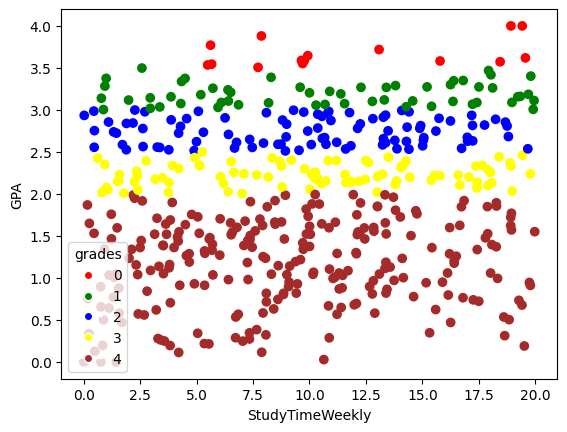

In [7]:
# sacar una porcion de los datos para hacer plot y entenderlos mejor
students_plot_example = students[1:500]

# Mapear clases a colores
color_map = {
    0: 'red', #A
    1: 'green', #B
    2: 'blue', #C
    3: 'yellow', #D
    4: 'brown' #E
    }

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar los puntos
scatter = ax.scatter(students_plot_example['StudyTimeWeekly'], students_plot_example['GPA'], c=students_plot_example['GradeClass'].map(color_map))

# Establecer etiquetas 
ax.set(xlabel='StudyTimeWeekly', ylabel='GPA')

# Crear leyenda 
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=label) for label, color in color_map.items()]
ax.legend(handles=legend_elements, loc="lower left", title="grades")

plt.show()

Podemos apreciar que a mediada que sube el rendimiento (GPA) las clases cambian -> llendo hacia el rojo (clase A), pero también notamos que los horas de estudio semanales no afectan tanto como se podría creer

In [8]:
# Dividir dataset en conjunto de entrenamiento y de prueba  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
# Pre procesar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [10]:
# Ver los coeficientes y el término de intercepción
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

Coeficientes: [[ 0.6681228   0.01907871 -0.30142295  0.17275804 -0.31256076  0.15356942
  -0.50031894  0.36770579  0.87565928  0.00288471  0.01090202 -0.73605332
   0.22210271  1.00303432]
 [-0.01663153  0.20883915  0.22134652 -0.24656723  0.1008849   0.19941202
  -1.19612887  0.34900478  0.20381011  0.20671992  0.07951391  0.49882647
   0.0226162   1.11919626]
 [-0.10338015 -0.00254472 -0.21186525  0.2884532   0.2260675  -0.10507798
   0.05608096 -0.04467013 -0.22626481  0.12281356 -0.17798814  0.08030255
  -0.00255915  0.53560855]
 [-0.15106702 -0.21524265  0.29724719 -0.09808916 -0.1037964  -0.31775631
   0.34092446 -0.25681342 -0.24988926 -0.09325971 -0.03208351  0.12808062
  -0.04558279 -0.60564295]
 [-0.39704411 -0.0101305  -0.00530551 -0.11655485  0.08940476  0.06985284
   1.29944239 -0.41522702 -0.60331532 -0.23915848  0.11965573  0.02884368
  -0.19657697 -2.05219618]]
Intercepto: [-2.64511739 -1.43777142  0.6831913   1.39118995  2.00850756]


In [11]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [12]:
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística en el conjunto de prueba: {:.2f}".format(accuracy))

Precisión del modelo de regresión logística en el conjunto de prueba: 0.68


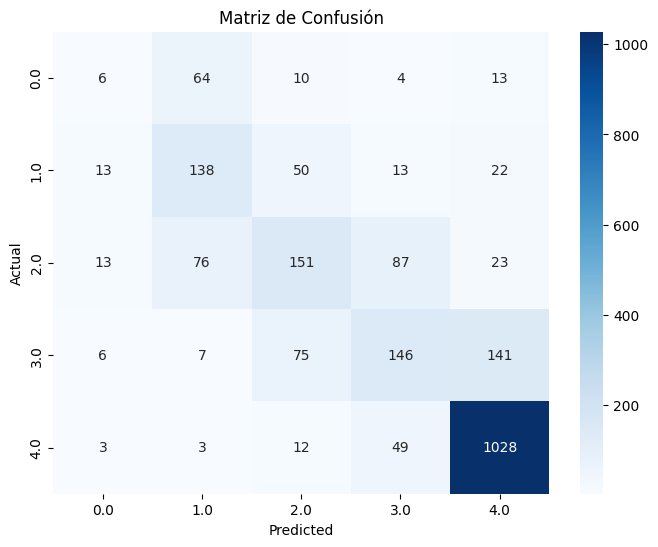

In [13]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [14]:
# Calcular precision, recall y F1-score
l = []
for x in labels:
    if x == 0.0:
        l.append("A")
    if x == 1.0:
        l.append("B")
    if x == 2.0:
        l.append("C")
    if x == 3.0:
        l.append("D")
    if x == 4.0:
        l.append("E")
print(l)

report = classification_report(y_test, y_pred, target_names=l)
print("Reporte de Clasificación:")
print(report)

['A', 'B', 'C', 'D', 'E']
Reporte de Clasificación:
              precision    recall  f1-score   support

           A       0.15      0.06      0.09        97
           B       0.48      0.58      0.53       236
           C       0.51      0.43      0.47       350
           D       0.49      0.39      0.43       375
           E       0.84      0.94      0.89      1095

    accuracy                           0.68      2153
   macro avg       0.49      0.48      0.48      2153
weighted avg       0.65      0.68      0.66      2153



### Probar otras configuraciones de la regresión logistica de scikit learn

In [15]:
# Probar otras configuraciones de la regresión logistica de scikit learn
model = LogisticRegression(penalty='l1', solver='liblinear')  # L1 regularización
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
report = classification_report(y_test, y_pred, target_names=l)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           A       0.06      0.01      0.02        97
           B       0.44      0.59      0.50       236
           C       0.48      0.39      0.43       350
           D       0.46      0.23      0.31       375
           E       0.79      0.98      0.87      1095

    accuracy                           0.67      2153
   macro avg       0.45      0.44      0.43      2153
weighted avg       0.61      0.67      0.62      2153



Para estos datos el primer modelo con la configuración estandar parece ser mejor en términos de precisión global, promedios macro y ponderados, y tiene un mejor desempeño en la mayoría de las clases individuales.

## Maquina de soporte vectorial para clasificación

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [17]:
# Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_scaled)

In [18]:
# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo SVM:", accuracy)

Accuracy del modelo SVM: 0.7398978169995355


Matriz de Confusión:
[[   7   64    8    4   14]
 [  11  155   39    7   24]
 [  17   63  187   66   17]
 [   7    4   67  239   58]
 [   3    4    5   78 1005]]


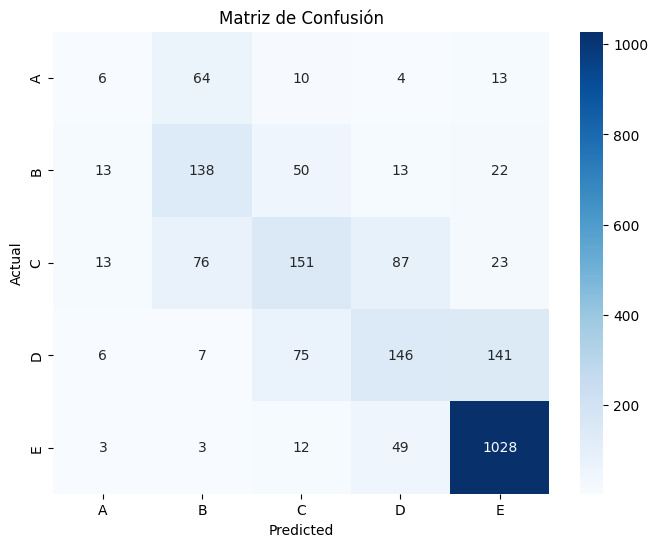

Reporte de Clasificación:
              precision    recall  f1-score   support

           A       0.16      0.07      0.10        97
           B       0.53      0.66      0.59       236
           C       0.61      0.53      0.57       350
           D       0.61      0.64      0.62       375
           E       0.90      0.92      0.91      1095

    accuracy                           0.74      2153
   macro avg       0.56      0.56      0.56      2153
weighted avg       0.73      0.74      0.73      2153



In [19]:
# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Obtener etiquetas únicas presentes en y_test y y_pred
labels = sorted(set(y_test) | set(y_pred))

l = []
for x in labels:
    if x == 0.0:
        l.append("A")
    if x == 1.0:
        l.append("B")
    if x == 2.0:
        l.append("C")
    if x == 3.0:
        l.append("D")
    if x == 4.0:
        l.append("E")

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=l, yticklabels=l)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

# Calcular precision, recall y F1-score
report = classification_report(y_test, y_pred, target_names=l)
print("Reporte de Clasificación:")
print(report)

In [20]:
# probar otra configuración de svc
svm_model = SVC(kernel='linear', class_weight='balanced') # porque hay mucha gente en la clase E
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo SVM:", accuracy)
report = classification_report(y_test, y_pred, target_names=l)
print("Reporte de Clasificación:")
print(report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Accuracy del modelo SVM: 0.6730143985137018
Reporte de Clasificación:
              precision    recall  f1-score   support

           A       0.17      0.42      0.24        97
           B       0.53      0.50      0.52       236
           C       0.59      0.41      0.49       350
           D       0.52      0.70      0.60       375
           E       0.93      0.81      0.86      1095

    accuracy                           0.67      2153
   macro avg       0.55      0.57      0.54      2153
weighted avg       0.73      0.67      0.69      2153

Matriz de Confusión:
[[ 41  37   5   4  10]
 [ 64 118  30   5  19]
 [ 60  60 144  72  14]
 [ 35   4  51 264  21]
 [ 38   2  13 160 882]]


### Selección de modelo y justificación

Al ver los datos podemos decir que para el problema de los estudiantes es mejor usar el modelo de regresión lineal, ya que aunque
le diferencia en sus reportes no es tan notable, existe y además es más facil de implementar y entender que el SVC

# Problema de regresión
uso del dataset : Pokémon Combat Power Prediction

disponible en : https://www.kaggle.com/datasets/sujithmandala/pokmon-combat-power-prediction/data

### Regresión lineal

In [21]:
poke_set = pd.read_csv('pokemon.csv')
poke_set.head()

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


### Entendiento los datos

El dataset de "pokemon.csv" tiene una colección de información sobre 151 pokemos, La variable que buscamos estimar el "Combat Power" la cual puede estar relacionada con los demás elementos de la tabla como el hp, la defensa o la estadistica de ataque. 

In [22]:
# Preprocesamiento de los datos
encode = LabelEncoder()
for i in ['Type 1', 'Type 2', 'Legendary']:
    poke_set[i] = encode.fit_transform(poke_set[i])

In [23]:
features = ['Type 1','Type 2','HP','Defense','Sp. Atk','Sp. Def','Speed','Legendary']
X = poke_set[features]
y = poke_set['Combat Power']

In [24]:
# Separar los datos para entrenamiento del modelo
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2)

In [25]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [26]:
result = model.score(X_test, Y_test)
Y_pred = model.predict(X_test)
print(f'Score: {result}')
print(f"mse: {mean_squared_error(Y_test,Y_pred)}")
print(f"r2: {r2_score(Y_test,Y_pred)}")
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print(f"rmse: {rmse}")

# Comparar con la desviación estándar de y_test
std_y_test = np.std(Y_test)
print(f"Desviación estándar de y_test: {std_y_test}")


Score: 0.9507685476810545
mse: 531.483189604966
r2: 0.9507685476810545
rmse: 23.05391918101922
Desviación estándar de y_test: 103.90188880573128


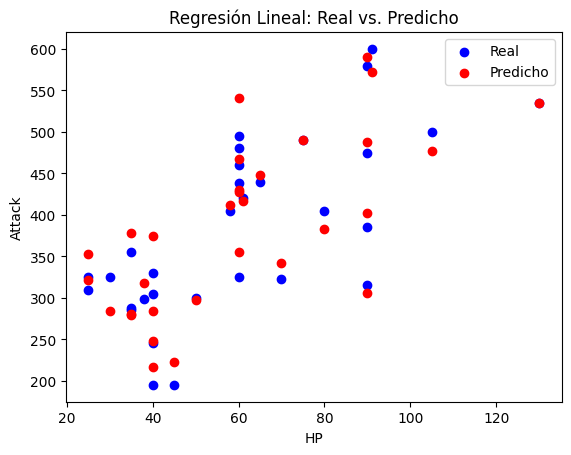

In [27]:
X
# Visualizar la relación entre la variable objetivo y una de las características
plt.scatter(X_test['HP'], Y_test, color='blue', label='Real')
plt.scatter(X_test['HP'], Y_pred, color='red', label='Predicho')
plt.xlabel('HP')
plt.ylabel('Attack')
plt.title('Regresión Lineal: Real vs. Predicho')
plt.legend()
plt.show()

In [28]:

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entrenar el modelo con las características polinómicas
model.fit(X_train_poly, Y_train)
Y_pred = model.predict(X_test_poly)
result = model.score(X_test_poly, Y_test)

print(f'Score: {result}')
print(f"mse: {mean_squared_error(Y_test,Y_pred)}")
print(f"r2: {r2_score(Y_test,Y_pred)}")
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print(f"rmse: {rmse}")

# Comparar con la desviación estándar de y_test
std_y_test = np.std(Y_test)
print(f"Desviación estándar de y_test: {std_y_test}")

Score: 0.9249539414511951
mse: 810.1674170893947
r2: 0.9249539414511951
rmse: 28.463440008006668
Desviación estándar de y_test: 103.90188880573128


Podemos nostar que al usar caracteristicas polinomicas las medidas de error aumentan por lo que no hay o no hay muchas relaciones que no sean lineales.

Por lo tanto es mejor usar la regresión lineal simple para este dataset


### svr para regresión

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

SVR()

In [31]:
# Hacer predicciones en el conjunto de prueba
y_pred = svr_model.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 9936.94
R^2 Score: 0.11


In [32]:
# Cambiar ajustes del modelo
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_svr_model = grid_search.best_estimator_
best_svr_model.fit(X_train_scaled, y_train)

SVR(C=100, epsilon=1, gamma=0.01)

In [33]:
# Hacer predicciones en el conjunto de prueba
y_pred = best_svr_model.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 460.54
R^2 Score: 0.96


### Selección del modelo

Podemos notar que al hacer ajustes al SVR podemos optener medidas de error menores, por lo que un mejor modelo para este data set es un SVR con
los ajustes presentados.

# Conclusiones

En el presente trabajo se abordaron problemas de clasificación como de regresión, los resolví usando técnicas de aprendizaje supervisado. Dichos problemas los escoji desde la web de kaggle.com por recomenadación del docente y al realizar la elección sobre que dataset´s usar tome en cuenta los tipos de datos
que tenian estos dataset y el problema que tenian. Esto para aligerar el preprocesamiento de datos y enfocarme en entrenar y comprar los modelos que use.
Al hacer este trabajo me percaté que los problemás de regresión pueden implementarse más rapido, pero son mucho más complejos de entender que los de clasificación.
Con respecto a las elecciones que hice, estas se basaron principalmente en comparar los resultados de los modelos y las metricas de evaluación que generé y otro factor importante que tomé en cuenta fue la la complejidad que me supuso llegar a entender lo que estaba haciendo e implementarlo de manera correcta.
Al llegar al final de esta tarea pude darme cuenta que me faltó leer y comprender mejor la documentación de cada modelo presente en scikit learn,ya que pueden recibir muchas configuraciones además de las que usé, así quedará como desafio personal y objetivo para el siguiente trabajo.     